In [80]:
%pip install geopandas tqdm osmnx matplotlib


Note: you may need to restart the kernel to use updated packages.


https://geoffboeing.com/2016/11/osmnx-python-street-networks/

In [81]:
import osmnx as ox
import networkx as nx
import os
import folium


In [82]:


area_graph = ox.graph_from_point((50.467388, 4.871985), dist=1000, dist_type='bbox', network_type='walk')


In [83]:
# assign area_graph to G for manipulation
G=area_graph

In [84]:
def plot_graph_k(G):
  ec = ox.plot.get_edge_colors_by_attr(G, attr="length", num_bins=5)

  # otherwise, when num_bins is None (default), linearly map one color to each node/edge by value
  ec = ox.plot.get_edge_colors_by_attr(G, attr="length")

  # plot the graph with colored edges
  fig, ax = ox.plot_graph(G, node_size=5, edge_color=ec, bgcolor="k")

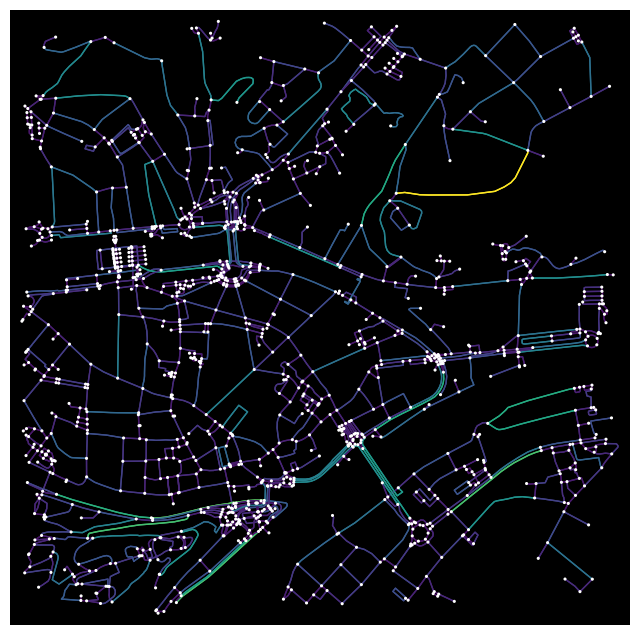

In [85]:
plot_graph_k(G)


In [86]:
def find_shortest_path_between_two_points(G,point1,point2):
  w = "length"
  node_point1=ox.nearest_nodes(G,point1[1],point1[0])
  node_point2=ox.nearest_nodes(G,point2[1],point2[0])
  route_point1_point2 = ox.shortest_path(G, node_point1, node_point2, weight=w, cpus=2)
  return route_point1_point2

In [87]:
#Position actuelle (latitude - longitude)
point1_latlon=(50.467388, 4.871985)

# POI  (latitude - longitude)
point2_latlon= (50.4672164, 4.8592783)

#get distance
shortest_route=find_shortest_path_between_two_points(G,point1_latlon,point2_latlon)
shortest_route

[1036605345,
 1036605342,
 11101080251,
 312169634,
 312169629,
 1084301800,
 1084131908,
 1084131893,
 302007822,
 302013259,
 302007795,
 302007780,
 10204010378,
 365604165]

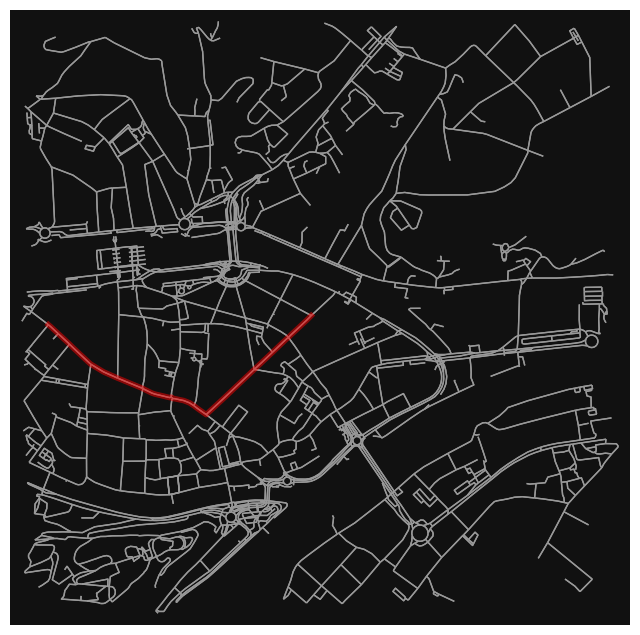

In [88]:
fig, ax = ox.plot_graph_route(G, shortest_route, orig_dest_size=0, node_size=0)


In [89]:
shortest_path_coords = [(G.nodes[node]["y"], G.nodes[node]["x"]) for node in shortest_route]

mymap = folium.Map(location=shortest_path_coords[0], zoom_start=15)

folium.Marker(location=shortest_path_coords[0], popup="Origin", icon=folium.Icon(color='red', prefix='fa',icon='male')).add_to(mymap)
folium.Marker(location=shortest_path_coords[-1], popup="Destination", icon=folium.Icon(color="green", icon="flag")).add_to(mymap)

folium.PolyLine(locations=shortest_path_coords, color="blue", weight=5, opacity=0.7).add_to(mymap)
mymap

https://darigak.medium.com/your-guide-to-folium-markers-b9324fc7d65d